In [1]:
# Import libraries for simulation
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def limit_mem():
    tf.Session.close
    cfg = K.tf.ConfigProto()
    cfg.gpu_options.allow_growth = True
    K.set_session(K.tf.Session(config=cfg))

In [3]:
#limit_mem()

In [4]:
def DisplayFractal(a, fmt='jpeg'):
  """Display an array of iteration counts as a
     colorful picture of a fractal."""
  a_cyclic = (6.28*a/20.0).reshape(list(a.shape)+[1])
  #img = np.concatenate([10+20*np.cos(a_cyclic), 30+50*np.sin(a_cyclic), 155-80*np.cos(a_cyclic)], 2)
  img = np.concatenate([128+20*np.cos(a_cyclic), 128+50*np.sin(a_cyclic), 128-80*np.cos(a_cyclic)], 2)
  img[a==a.max()] = 0
  a = img
  a = np.uint8(np.clip(a, 0, 255))
  plt.imshow(a)
  plt.show()

In [5]:
def cv(a):
    a_cyclic = (6.28*a/20.0).reshape(list(a.shape)+[1])
    return np.concatenate([128+20*np.cos(a_cyclic), 128+50*np.sin(a_cyclic), 128-80*np.cos(a_cyclic)], 2)

In [6]:
tf.reset_default_graph()

In [27]:
Y, X = np.mgrid[0.48:0.68:0.0005, 0.2:0.4:0.0005]
#Y, X = np.mgrid[-1.25:1.25:0.0025, -2.:0.5:0.0025]
Z = X + 1j*Y
xs = tf.constant(Z.astype(np.complex64), name='xs')
zs = tf.Variable(xs, name='zs')
ns = tf.Variable(tf.zeros_like(xs, tf.float32), name='ns')

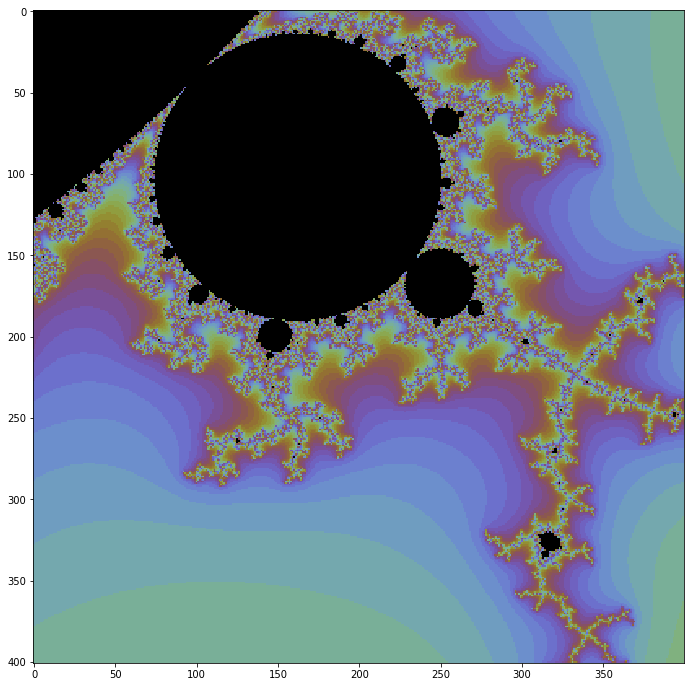

CPU times: user 1min 9s, sys: 15.5 s, total: 1min 24s
Wall time: 20.5 s


In [33]:
%%time
with tf.device('/cpu:0'):
    sess = tf.InteractiveSession()
    tf.global_variables_initializer().run()
    zs_ = zs*zs + xs
    not_diverged = tf.abs(zs_) < 4
    step = tf.group(
      zs.assign(zs_),
      ns.assign_add(tf.cast(not_diverged, tf.float32, name='casty'))
      )

    for i in range(5000):
        step.run()

    plt.figure(figsize=(12, 12))
    DisplayFractal(ns.eval())
    plt.show()

In [29]:
CPU times: user 1min 9s, sys: 15.5 s, total: 1min 24s
Wall time: 20.5 s

SyntaxError: invalid syntax (<ipython-input-29-d9b83c55cc2e>, line 1)

In [ ]:
CPU times: user 25.2 s, sys: 6.79 s, total: 32 s
Wall time: 10.8 s